Bank Churn prediction
===
This lecture covers predicting customer churn behavior at a bank using supervised machine learning models. It walks through the full process from exploratory data analysis to feature engineering, model training, evaluation, and deployment.

Some key points:
---
- Exploratory data analysis is done visualizing the data distributions and relationships using techniques like countplots.
- Feature engineering steps include one-hot encoding categorical variables like country and label encoding for gender.
- Several models are trained and evaluated: logistic regression, random forest, and XGBoost. Metrics like F1-score, recall, and confusion matrices are used.
- An ensemble combining the logistic regression and XGBoost models is created and shows improved performance.
- Final models are saved for deployment using pickle.
- Code is provided to run the full pipeline on Google Colab using data from Kaggle.

```
How to face the Layoff flow in Market's trend

If we are not being reused in the workplace, we can analyze customer data to understand the customer churn rate,
thereby increasing our importance and indispensability.

```

Reference
---

1. [src](https://platform.stratascratch.com/data-projects/customer-churn-prediction)
2. [src](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset), from kaggle
3. [Home work](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb), [data](https://www.kaggle.com/datasets/sebastienverpile/consumercomplaintsdata)
4. [Microsoft lecture](https://github.com/microsoft/fabric-samples/blob/main/docs-samples/data-science/ai-samples/python/AIsample%20-%20Bank%20Customer%20Churn.ipynb), [Lecture](https://github.com/microsoft/fabric-samples/blob/main/docs-samples/data-science/ai-samples/python/AIsample%20-%20Bank%20Customer%20Churn.ipynb)

   
[code](https://www.analyticsvidhya.com/blog/2022/09/bank-customer-churn-prediction-using-machine-learning/)

Steps
---
1. Load data,
    - download data from Kaggle and saved in Google drive;
    - load directly from Google drive;
2. EDA, Exploratory Data analysis
   - fill NaN if any
   - Feature distributed
3. Feature Engineering
   - drop un-required features
   - convert by standardization, normalization
   - create new features
   - convert categorical data to numerical data,
   - binning numerical data binary
   - encode non-numerical data
   - data imbanlance
4. modeling
   - split data into train-test sets
   - cv folding
   - feature importance
   - hyperparameters
5 ...    

Run in Google Drive, colab
---

1. Login google drive, add `colab` plugin
2. create 2024 foloder, enter it and create data, named data; download data from Kaggle to it.
3. create colab, open left menu and upload kaggle data intp `data`
4. run

In [1]:
# feature encoder
!pip install -q category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [2]:
#!pip install -q -U imblearn
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [3]:
!pip install -U -q xgboost lightgbm catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.1 MB/s eta 0:00:00


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

import gc
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy import stats
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

import category_encoders as ce

from collections import Counter
from imblearn.over_sampling import SMOTE


import pickle
import seaborn as sns

import itertools

import warnings
warnings.filterwarnings("ignore")



```
# This is formatted as code
```

1 Load Data
---

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
data= '/content/gdrive/MyDrive/2023/2023-2-Python-AI/data/archive.zip'
df=pd.read_csv(data)

In [ ]:
df.head(2)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


2 Exploratory Data Analaysis, EDA
---

In [ ]:
# 10 numerical feathers, 2 object ones; and target is churn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
# good, no null cell
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
# rate of churn; too low to take care
# only 20 % in churm

df[['churn']].mean()

churn    0.2037
dtype: float64

In [ ]:
# churn indepement of one's gender

df.groupby("gender").agg({"churn": ["mean","count"]})

churn      
            mean count
gender                
Female  0.250715  4543
Male    0.164559  5457

In [ ]:
# churn rate of Germany is igher than others

df.groupby("country").agg({"churn": ["mean","count"]})

churn      
             mean count
country                
France   0.161548  5014
Germany  0.324432  2509
Spain    0.166734  2477

In [ ]:
#  churn rate indepent of whether owns creredict card

df.groupby("credit_card").agg({"churn": ["mean","count"]})

churn      
                 mean count
credit_card                
0            0.208149  2945
1            0.201843  7055

In [ ]:
# churn rate is lower if one registered from activity

df.groupby("active_member").agg({"churn": ["mean","count"]})


churn      
                   mean count
active_member                
0              0.268509  4849
1              0.142691  5151

In [ ]:
# the more one purchased, the more one is in churn state

df.groupby("products_number").agg({"churn": ["mean","count"]})

churn      
                     mean count
products_number                
1                0.277144  5084
2                0.075817  4590
3                0.827068   266
4                1.000000    60

In [ ]:
# no info?
df.groupby("tenure").agg({"churn": ["mean","count"]})

churn      
            mean count
tenure                
0       0.230024   413
1       0.224155  1035
2       0.191794  1048
3       0.211100  1009
4       0.205258   989
5       0.206522  1012
6       0.202689   967
7       0.172179  1028
8       0.192195  1025
9       0.216463   984
10      0.206122   490

Kinds of Features
---

In [7]:
target= 'churn'
categorical_variables = [col for col in df if col in "O"
                         or df[col].nunique() <=10
                         and col not in target]
print("Categorical Features: ",categorical_variables)

Categorical Features:  ['country', 'gender', 'products_number', 'credit_card', 'active_member']


In [8]:
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >5]
print("Numerical Features: ",numeric_variables)

Numerical Features:  ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'estimated_salary']


In [ ]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

Python Syntax
---
1. Suppose that
```
X=[X0,X1,X2,...]
```
`enumerate(X)` display out:
```
0, X0
1, X1
...
```

2. create a sequence of pictues, `(m Rows X n Columns)` pictures:
```python
fig, axes = plt.subplots(nrows = m, ncols= n)
sns.histplot(df[col], ax=axes[i][j]
```


In [ ]:
# observe the numeric fertures what they are distributed, whether are instributed in Normal (Gaussian)
# visualize kde density plot and check whether in Gaussian
def kde_QQ_vis(df, cols):
    sns.set_style('whitegrid')
    # Create a figure and a set of subplots
    fig, axes = plt.subplots(nrows=len(cols), ncols=2, figsize=(10, 3 * len(cols)))
    for i, col in enumerate(cols):
        # Histogram for the column
        sns.histplot(df[col], kde=True, ax=axes[i][0], color='red', edgecolor='black')
        axes[i][0].set_title(f'Histogram of {col}', fontsize=12)
        axes[i][0].set_xlabel('')
        axes[i][0].set_ylabel('Density')

        # Q-Q plot for the column
        stats.probplot(df[col], dist="norm", plot=axes[i][1])
        axes[i][1].set_title(f'Q-Q Plot of {col}', fontsize=12)
        axes[i][1].set_xlabel('Theoretical Quantiles')
        axes[i][1].set_ylabel('Ordered Values')
        axes[i][1].get_lines()[0].set_color('blue')
        axes[i][1].get_lines()[1].set_color('red')
    # Adjust the layout
    plt.tight_layout()

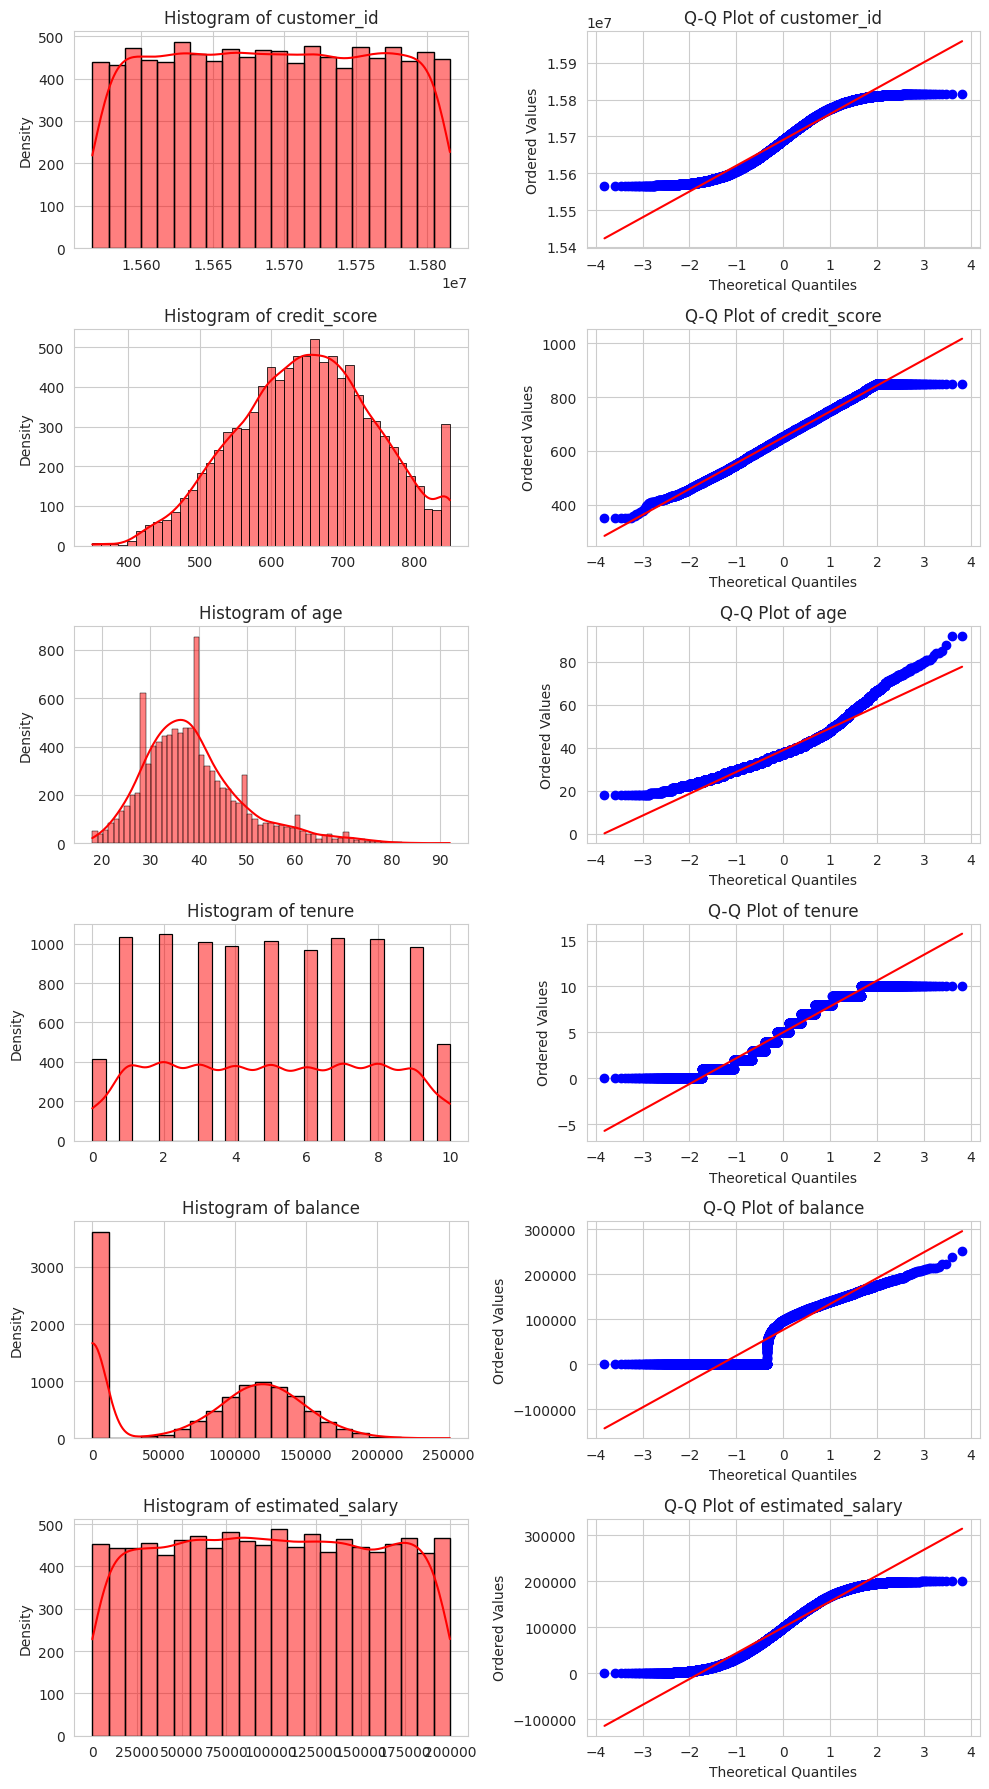

In [ ]:
# check 'credit_score', 'balance', 'estimated_salary'
kde_QQ_vis(df, numeric_variables)

Conclusion
---
The features, <b>`tenue`</b> and <b>`estimated_salary`</B>, are not distributed absolutely in Gaussian obviously!

Data normalized
---
Nonamized data do help to modeling; different type
 different conversion:
 1. sklearn.preprocessing.StandardScaler: Data in normal.
 $$\bar X_i=\frac{X_i-EX}{\sigma (X)}\sim N(0,1)$$
 2. sklearn.preprocessing.MinMaxScaler: Data in abnomal
 $$ \bar X_i=\frac{X_i-X_\min}{X_\max-X_\min}\sim U(0,1)$$

In [9]:
def StandardScaler(df,cols):
    for col in cols:
        df[col] = (df[col] - df[col].mean()) / df[col].std()
    return df
def NormalizationScaler(df,cols):
    for col in cols:
        df[col] = (df[col] - df[col].min()) / (df[col] .max()- df[col].min())
    return df

However numeric_variables[0]= `customer_id` redudent, each one owning unique one, give up.

In [ ]:
# data saved

saved='/content/gdrive/MyDrive/2023/2023-2-Python-AI/data/churn-data.csv'
df.to_csv(saved,index=False)

Data Washing, (Feature Engineer)
---
There are some packages that automatical do `Feature Engineering` work, suchas
- [Featuretools](https://github.com/alteryx/featuretools),
- [sklearn](https://scikit-learn.org/stable/)
```python
from sklearn.feature_selection import f_regression
scores, _ = f_regression(df.iloc[:,0:2], df.iloc[:,-1])
print(scores)
```
- [Feature-engine](https://feature-engine.trainindata.com/en/latest/)

Here, we manually do these works:

a). delete redundant features,`customer_id`<br>
b).

In [10]:
# drop un-required features
def clean_data(df):
    # Drop rows with missing data across all columns
    df.dropna(inplace=True)
    # Drop columns:  'customer_id',
    df.drop(columns=['customer_id'], inplace=True)
    return df

df_clean = clean_data(df)

In [ ]:
df_clean.head(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [11]:
# sklean example
# H0: the regression coefficient is equal to zero.
# i.e. non-implantant freture to be used to predictctarget

from sklearn.feature_selection import f_regression
scores, p_vals = f_regression(df.iloc[:,4:9], df.iloc[:,-1])
# Print the feature names and scores
for i, score in enumerate(scores):
    print(f"Feature {i+4}: {df.columns[i+4]} - Score: {score:.3f}, with p-value: {p_vals[i]:.2f}")

Feature 4: tenure - Score: 1.960, with p-value: 0.16
Feature 5: balance - Score: 142.474, with p-value: 0.00
Feature 6: products_number - Score: 22.915, with p-value: 0.00
Feature 7: credit_card - Score: 0.509, with p-value: 0.48
Feature 8: active_member - Score: 249.801, with p-value: 0.00


In [12]:
# Feature Engineering
# binning the data

df_clean["CreditsScore"] = pd.qcut(df_clean['credit_score'], 6, labels = [1, 2, 3, 4, 5, 6])
df_clean["Age"] = pd.qcut(df_clean['age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df_clean["Balance"] = pd.qcut(df_clean['balance'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
df_clean["EstSalary"] = pd.qcut(df_clean['estimated_salary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df_clean["Tenure"] = df_clean["tenure"]/df_clean["age"]
df_clean["Tenure_add_age"] = df_clean["tenure"]+df_clean["age"]
df_clean["Tenure_minus_age"] = df_clean["tenure"]-df_clean["age"]
df_clean["Tenure_times_age"] = df_clean["tenure"]*df_clean["age"]
df_clean.dtypes

credit_score           int64
country               object
gender                object
age                    int64
tenure                 int64
balance              float64
products_number        int64
credit_card            int64
active_member          int64
estimated_salary     float64
churn                  int64
CreditsScore        category
Age                 category
Balance             category
EstSalary           category
Tenure               float64
Tenure_add_age         int64
Tenure_minus_age       int64
Tenure_times_age       int64
dtype: object

In [13]:
#  data

y_clean = df_clean[target]
df_clean = df_clean.drop(target,axis=1)

In [ ]:
df_clean.dtypes

credit_score           int64
country               object
gender                object
age                    int64
tenure                 int64
balance              float64
products_number        int64
credit_card            int64
active_member          int64
estimated_salary     float64
CreditsScore        category
Age                 category
Balance             category
EstSalary           category
Tenure               float64
Tenure_add_age         int64
Tenure_minus_age       int64
Tenure_times_age       int64
dtype: object

In [ ]:
df_clean.nunique()

credit_score         460
country                3
gender                 2
age                   70
tenure                11
balance             6382
products_number        4
credit_card            2
active_member          2
estimated_salary    9999
CreditsScore           6
Age                    8
Balance                5
EstSalary             10
Tenure               414
Tenure_add_age        75
Tenure_minus_age      75
Tenure_times_age     363
dtype: int64

In [14]:
# Binary Feature value;
# convert the last four categorical features to numeric ones
features_=['CreditsScore','Age','Balance']
for f_ in features_:
    df_clean[f_] = df_clean[f_].astype(int)

df_clean['EstSalary'] = df_clean['EstSalary'].astype(float)

In [ ]:
df_clean.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
CreditsScore          int64
Age                   int64
Balance               int64
EstSalary           float64
Tenure              float64
Tenure_add_age        int64
Tenure_minus_age      int64
Tenure_times_age      int64
dtype: object

In [ ]:
# prompt: delete pandas column

#df_clean.drop(columns=['age','tenure','balance','estimated_salary'],axis=1,inplace=True)

Nornamize data
---

In [15]:
df_clean=StandardScaler(df_clean,['age','balance','estimated_salary'])

In [16]:
df_clean= NormalizationScaler(df_clean,['tenure'])

In [ ]:
df_clean.head(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,CreditsScore,Age,Balance,EstSalary,Tenure,Tenure_add_age,Tenure_minus_age,Tenure_times_age
0,619,France,Female,0.293503,0.2,-1.225786,1,1,1,0.021885,3,6,1,6.0,0.047619,44,-40,84
1,608,Spain,Female,0.198154,0.1,0.117344,1,0,1,0.216523,2,6,3,6.0,0.024390,42,-40,41


In [ ]:
df_clean.dtypes

credit_score          int64
country              object
gender               object
products_number       int64
credit_card           int64
active_member         int64
CreditsScore          int64
Age                   int64
Balance               int64
EstSalary           float64
Tenure              float64
Tenure_add_age        int64
Tenure_minus_age      int64
Tenure_times_age      int64
dtype: object

In [17]:
# combine features,string feafures only

def feature_bind(df,col1,col2):
    df[col1+'_'+col2]=df[col1].astype(str)+df[col2].astype(str)
    return df

In [18]:
df_clean =  feature_bind(df_clean,'country','gender')
df_clean =  feature_bind(df_clean,'country','products_number')
df_clean =  feature_bind(df_clean,'country','Age')

In [ ]:
df_clean.dtypes[-3:]

country_gender             object
country_products_number    object
country_Age                object
dtype: object

In [19]:
# database diveded

y = y_clean
X = df_clean


In [ ]:
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,...,Age,Balance,EstSalary,Tenure,Tenure_add_age,Tenure_minus_age,Tenure_times_age,country_gender,country_products_number,country_Age
0,619,France,Female,0.293503,0.2,-1.225786,1,1,1,0.021885,...,6,1,6.0,0.047619,44,-40,84,FranceFemale,France1,France6
1,608,Spain,Female,0.198154,0.1,0.117344,1,0,1,0.216523,...,6,3,6.0,0.024390,42,-40,41,SpainFemale,Spain1,Spain6
2,502,France,Female,0.293503,0.8,1.332987,3,1,0,0.240675,...,6,5,6.0,0.190476,50,-34,336,FranceFemale,France3,France6
3,699,France,Female,0.007456,0.1,-1.225786,2,0,0,-0.108912,...,5,1,5.0,0.025641,40,-38,39,FranceFemale,France2,France5
4,850,Spain,Female,0.388852,0.2,0.785689,1,1,1,-0.365258,...,6,4,4.0,0.046512,45,-41,86,SpainFemale,Spain1,Spain6


Feature Engineering
---
1. create new features:<br>
   a. 'gender'+'products_number'<br>
   b. 'customer': 'country'+'gender'<br>
   c. 'active_member'+'country'<br>
   d. 'country'+'products_number'<br>

In [ ]:

#X.drop(columns=['country_llo_enc','customers_llo_enc',	'customer1_llo_enc'],axis=1,inplace=True)

In [ ]:
X.head(2)

,credit_score,country,gender,products_number,credit_card,active_member,CreditsScore,Age,Balance,EstSalary,Tenure,Tenure_add_age,Tenure_minus_age,Tenure_times_age,country_gender,country_products_number,country_Age
0,619,France,Female,1,1,1,3,6,1,6.0,0.047619,44,-40,84,FranceFemale,France1,France6
1,608,Spain,Female,1,0,1,2,6,3,6.0,0.024390,42,-40,41,SpainFemale,Spain1,Spain6


In [21]:
def llo_encoder(df,col,target=y):
    df[col+'_llo_enc']=df[col]
    loo_encoder = ce.LeaveOneOutEncoder(cols=[col+'_llo_enc'], sigma=0.05)
    loo_encoder.fit(df, target)
    X_encoded = loo_encoder.transform(df)
    return X_encoded

In [22]:

f_convert=['country_gender','country_products_number','country_Age']
for col in f_convert:
    X_enc=llo_encoder(X,col)
    X=X_enc

In [ ]:
X.head(2)

,credit_score,country,gender,products_number,credit_card,active_member,CreditsScore,Age,Balance,EstSalary,Tenure,Tenure_add_age,Tenure_minus_age,Tenure_times_age,country_gender,country_products_number,country_Age,country_gender_llo_enc,country_products_number_llo_enc,country_Age_llo_enc
0,619,France,Female,1,1,1,3,6,1,6.0,0.047619,44,-40,84,FranceFemale,France1,France6,0.203450,0.224344,0.206838
1,608,Spain,Female,1,0,1,2,6,3,6.0,0.024390,42,-40,41,SpainFemale,Spain1,Spain6,0.212121,0.218673,0.212903


In [23]:
def target_encoder(df,col,target=y):
    df[col+'_target_enc']=df[col]
    target_encoder = ce.TargetEncoder(cols=[col+'_target_enc'])
    target_encoder.fit(df, target)
    X_encoded = target_encoder.transform(df)
    return X_encoded

In [24]:

f_convert=['country_gender','country_products_number','country_Age']
for col in f_convert:
    X_enc=target_encoder(X,col)
    X=X_enc

In [ ]:
X.head(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,...,Tenure_times_age,country_gender,country_products_number,country_Age,country_gender_llo_enc,country_products_number_llo_enc,country_Age_llo_enc,country_gender_target_enc,country_products_number_target_enc,country_Age_target_enc
0,619,France,Female,0.293503,0.2,-1.225786,1,1,1,0.021885,...,84,FranceFemale,France1,France6,0.203450,0.224344,0.206838,0.203450,0.224344,0.206838
1,608,Spain,Female,0.198154,0.1,0.117344,1,0,1,0.216523,...,41,SpainFemale,Spain1,Spain6,0.212121,0.218673,0.212903,0.212121,0.218673,0.212903


In [25]:
def glmm_encoder(df,col,target=y):
    df[col+'_glmm_enc']=df[col]
    glmm_encoder = ce.GLMMEncoder(cols=col, binomial_target=True)
    glmm_encoder.fit(df, target)
    X_encoded = glmm_encoder.transform(df)
    return X_encoded

In [31]:
f_convert=['country_gender','country_products_number','country_Age']
for col in f_convert:
    X_enc=glmm_encoder(X,col)
    X=X_enc

In [32]:
X.head(2)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,CreditsScore,...,country_Age,country_gender_llo_enc,country_products_number_llo_enc,country_Age_llo_enc,country_gender_target_enc,country_products_number_target_enc,country_Age_target_enc,country_gender_glmm_enc,country_products_number_glmm_enc,country_Age_glmm_enc
0,619,1,0.293503,0.2,-1.225786,1,1,1,0.021885,3,...,0.142562,0.203450,0.224344,0.206838,0.203450,0.224344,0.206838,-0.053594,-1.749919,0.142562
1,608,1,0.198154,0.1,0.117344,1,0,1,0.216523,2,...,0.174720,0.212121,0.218673,0.212903,0.212121,0.218673,0.212903,-0.002138,-1.782806,0.174720


In [27]:
# binary

X['gender']=X['gender'].apply(lambda x:1 if x=='Female' else 0)


In [28]:
X.drop(columns=['country'],axis=1,inplace=True)

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   credit_score                        10000 non-null  int64  
 1   gender                              10000 non-null  int64  
 2   age                                 10000 non-null  float64
 3   tenure                              10000 non-null  float64
 4   balance                             10000 non-null  float64
 5   products_number                     10000 non-null  int64  
 6   credit_card                         10000 non-null  int64  
 7   active_member                       10000 non-null  int64  
 8   estimated_salary                    10000 non-null  float64
 9   CreditsScore                        10000 non-null  int64  
 10  Age                                 10000 non-null  int64  
 11  Balance                             10000 

In [30]:
X.head(2)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,CreditsScore,...,country_Age,country_gender_llo_enc,country_products_number_llo_enc,country_Age_llo_enc,country_gender_target_enc,country_products_number_target_enc,country_Age_target_enc,country_gender_glmm_enc,country_products_number_glmm_enc,country_Age_glmm_enc
0,619,1,0.293503,0.2,-1.225786,1,1,1,0.021885,3,...,0.142562,0.203450,0.224344,0.206838,0.203450,0.224344,0.206838,FranceFemale,France1,France6
1,608,1,0.198154,0.1,0.117344,1,0,1,0.216523,2,...,0.174720,0.212121,0.218673,0.212903,0.212121,0.218673,0.212903,SpainFemale,Spain1,Spain6


In [ ]:
X.drop(columns=['country','country_gender','country_products_number',	'country_Age'],axis=1,inplace=True)
X.head(2)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,CreditsScore,...,Tenure,Tenure_add_age,Tenure_minus_age,Tenure_times_age,country_gender_llo_enc,country_products_number_llo_enc,country_Age_llo_enc,country_gender_target_enc,country_products_number_target_enc,country_Age_target_enc
0,619,1,0.293503,0.2,-1.225786,1,1,1,0.021885,3,...,0.047619,44,-40,84,0.203450,0.224344,0.206838,0.203450,0.224344,0.206838
1,608,1,0.198154,0.1,0.117344,1,0,1,0.216523,2,...,0.024390,42,-40,41,0.212121,0.218673,0.212903,0.212121,0.218673,0.212903


Data Imbalance
---
SMOTE + ENN

`A.` SMOTE selected each sample from the minority samples successively as the root sample for the synthesis of the new sample. <BR>
`B.` The following result was obtained by employing ENN to eliminate noise samples when the process of SMOTE is caused.

In [34]:
# imbalance set
from imblearn.combine import SMOTEENN


def imbance_set(X,y):
    # Create the SMOTEENN object
    sme = SMOTEENN(random_state=42)

    # Fit and resample the data
    X_resampled, y_resampled = sme.fit_resample(X, y)

    # Counting churn values
    churn_counts = y_resampled.value_counts()
    print(churn_counts)
    return X_resampled, y_resampled

In [35]:
X,y=imbance_set(X,y)

churn
1    6032
0    4226
Name: count, dtype: int64


In [ ]:
len(X)

10258

In [ ]:
X.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'Tenure', 'CreditsScore', 'Age', 'Balance', 'EstSalary', 'cumtomer',
       'gender_products_number', 'gender_products_number_llo_enc',
       'country_products_number', 'country_products_number_llo_enc',
       'country_llo_enc', 'customer_llo_enc', 'country_target_enc',
       'customers_target_enc', 'country_glmm_enc', 'customer_glmm_enc'],
      dtype='object')

In [36]:
features=list(X.columns)
target = 'churn'

In [ ]:
X[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   credit_score                        10000 non-null  int64  
 1   gender                              10000 non-null  int64  
 2   age                                 10000 non-null  float64
 3   tenure                              10000 non-null  float64
 4   balance                             10000 non-null  float64
 5   products_number                     10000 non-null  int64  
 6   credit_card                         10000 non-null  int64  
 7   active_member                       10000 non-null  int64  
 8   estimated_salary                    10000 non-null  float64
 9   CreditsScore                        10000 non-null  int64  
 10  Age                                 10000 non-null  int64  
 11  Balance                             10000 

Model
---
database -> train set and test set

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = XGB_model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

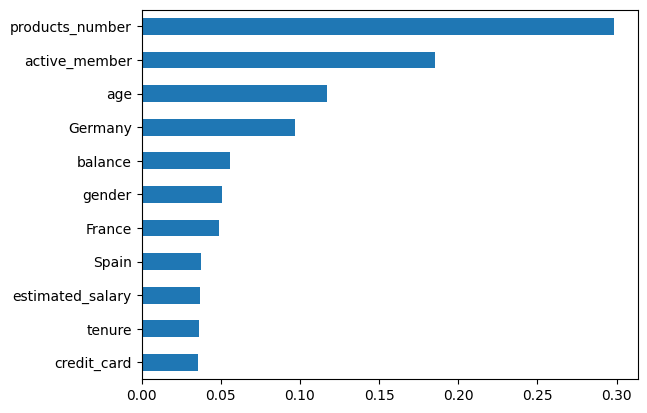

In [ ]:
feat_importances = pd.Series(XGB_model.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh');

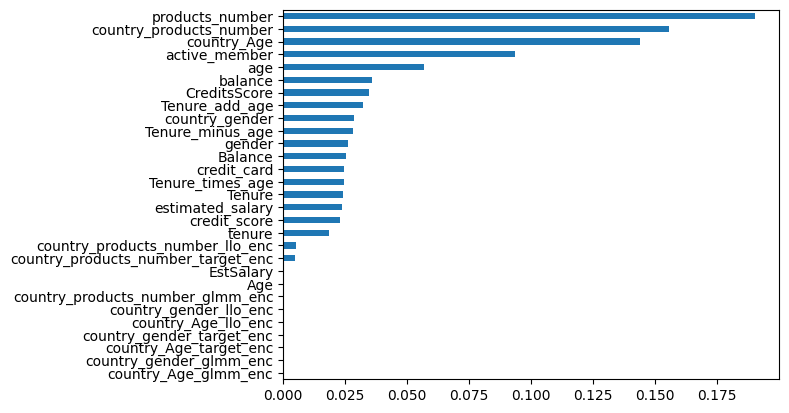

In [ ]:
# loo,target
feat_importances = pd.Series(XGB_model.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh');

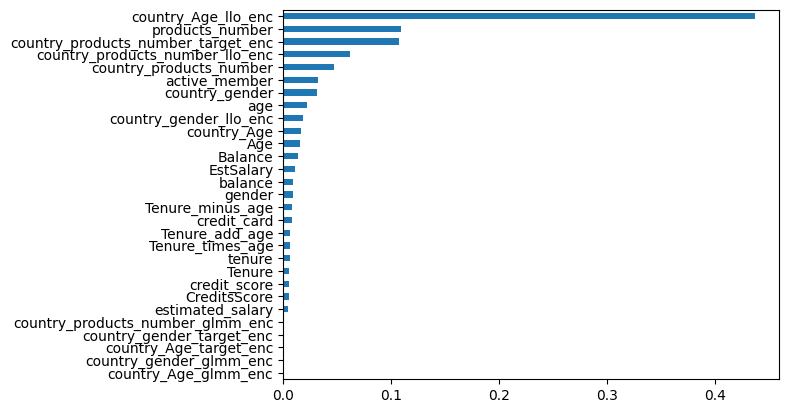

In [ ]:
# loo,target
feat_importances = pd.Series(XGB_model.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh');

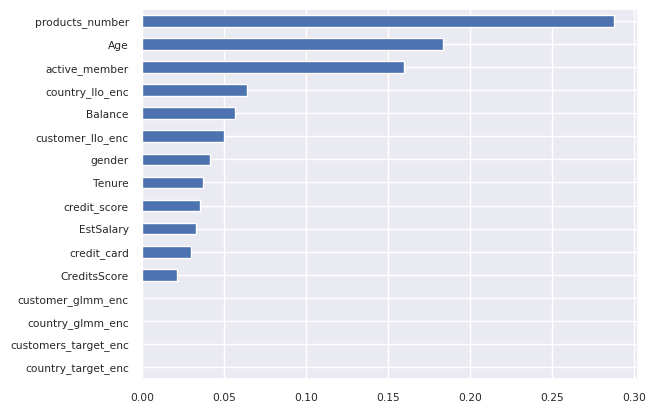

In [ ]:
feat_importances = pd.Series(XGB_model.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh');

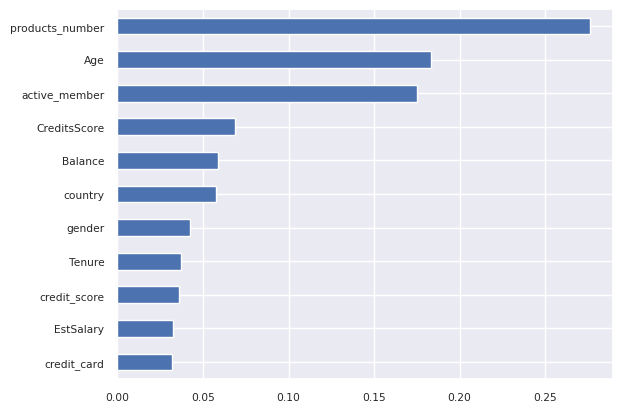

In [ ]:
feat_importances = pd.Series(XGB_model.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh');

In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('test Accuracy:', accuracy)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print('test Recall:', recall)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print('test F1 score:', f1)

test Accuracy: 0.8595
test Recall: 0.5063613231552163
test F1 score: 0.5861561119293077


In [ ]:
# Banlance, Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('test Accuracy:', accuracy)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print('test Recall:', recall)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print('test F1 score:', f1)

test Accuracy: 0.9478557504873294
test Recall: 0.9408783783783784
test F1 score: 0.9541755888650963


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Create a neural network model
k_model = Sequential()
k_model.add(Dense(11, activation='relu', input_shape=(df.shape[1],)))
k_model.add(Dense(4, activation='relu'))
k_model.add(Dense(1, activation='sigmoid'))
k_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Create a Keras model
k_model = Sequential()
k_model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
k_model.add(Dense(32, activation='relu'))
k_model.add(Dense(1, activation='sigmoid'))
k_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
k_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
63/63 [==============================] - 2s 12ms/step - loss: 812.2886 - accuracy: 0.6850 - val_loss: 108.2887 - val_accuracy: 0.5720
Epoch 2/10
63/63 [==============================] - 0s 5ms/step - loss: 121.7262 - accuracy: 0.6734 - val_loss: 82.0597 - val_accuracy: 0.7895
Epoch 3/10
63/63 [==============================] - 0s 6ms/step - loss: 92.1541 - accuracy: 0.6674 - val_loss: 117.8903 - val_accuracy: 0.6570
Epoch 4/10
63/63 [==============================] - 0s 5ms/step - loss: 89.0440 - accuracy: 0.6712 - val_loss: 71.3871 - val_accuracy: 0.7620
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 90.4246 - accuracy: 0.6785 - val_loss: 43.5184 - val_accuracy: 0.5410
Epoch 6/10
63/63 [==============================] - 0s 4ms/step - loss: 107.7794 - accuracy: 0.6745 - val_loss: 82.2017 - val_accuracy: 0.7960
Epoch 7/10
63/63 [==============================] - 0s 4ms/step - loss: 100.6753 - accuracy: 0.6779 - val_loss: 108.0776 - val_accuracy: 0.549

In [ ]:
# Predict on the testing data
y_pred = k_model.predict(X_test)

# Convert the predictions to binary labels
y_pred = (y_pred > 0.4).astype(int)


63/63 [==============================] - 0s 1ms/step


In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('test Accuracy:', accuracy)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print('test Recall:', recall)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print('test F1 score:', f1)

test Accuracy: 0.7895
test Recall: 0.009876543209876543
test F1 score: 0.018648018648018648


In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('test Accuracy:', accuracy)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print('test Recall:', recall)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print('test F1 score:', f1)

test Accuracy: 0.863
test Recall: 0.5114503816793893
test F1 score: 0.5946745562130177


Metrics
---

1. `Precision`: Precision is the ratio of true positives (TP) to the sum of true positives and false positives (FP):
Precision = TP / (TP + FP)

2. `Recall`: Recall is the ratio of true positives (TP) to the sum of true positives and false negatives (FN):
Recall = TP / (TP + FN)

3. `F1`-score: The F1-score is the harmonic mean of precision and recall:
$$F1 = 2  \frac{\text{Precision}\times \text{Recall}}{\text{Precision + Recall}}$$

In [ ]:
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(cnf_matrix)
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.66      0.52      0.58       405

    accuracy                           0.85      2000
   macro avg       0.77      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000



0.849

In [ ]:
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(cnf_matrix)
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.68      0.48      0.56       393

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



0.852

In [ ]:
# loo, GLMM, target, country_products_number
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(cnf_matrix)
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1607
           1       0.69      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



0.8595

In [ ]:
# loo,  country_products_number
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(cnf_matrix)
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



0.8595

In [ ]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.summer):
    plt.clf
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',fontsize=22)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

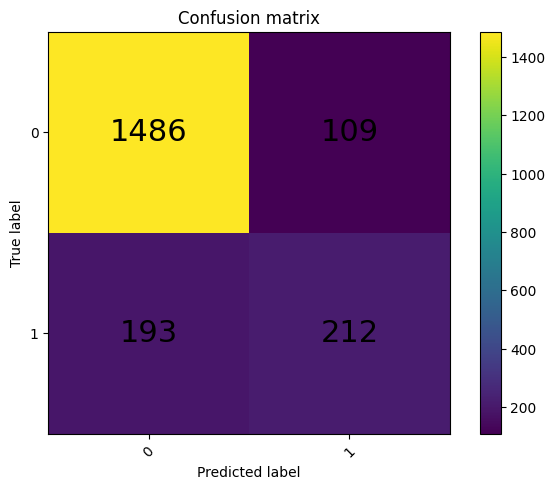

In [ ]:
plot_confusion_matrix(cnf_matrix, np.unique(y_pred))


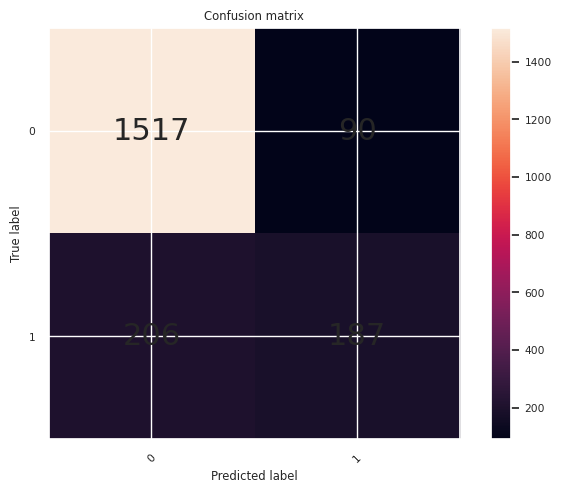

In [ ]:
plot_confusion_matrix(cnf_matrix, np.unique(y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 20)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.24 %
Standard Deviation: 1.32 %


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = XGB_model, X = X_train, y = y_train, cv = 20)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.46 %
Standard Deviation: 1.60 %


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = XGB_model, X = X_test, y = y_test, cv = 20)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.65 %
Standard Deviation: 3.02 %


Random Forest Classification, rfc
---
Set of week models

In [ ]:
rfc1= RandomForestClassifier(max_depth=4, max_features=4, min_samples_split=3, random_state=1) # Pass hyperparameters

rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=4, min_samples_split=3,
                       random_state=1)

In [ ]:
def plot_feature_importances(model):
    feat_importances = pd.Series(model.feature_importances_, index = X_train.columns).sort_values(ascending = True)
    feat_importances.plot(kind = 'barh');
    #plt.barh(range(n_features), model.feature_importances_, align='center')
    #plt.yticks(np.arange(n_features), X.columns)

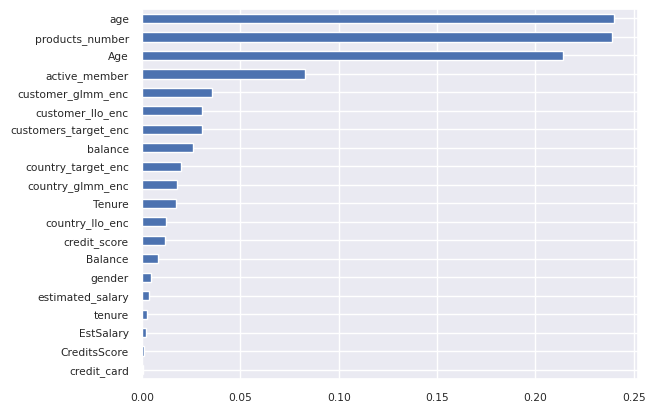

In [ ]:
plot_feature_importances(rfc1)

In [ ]:
#Calculate the accuracy
y_pred = rfc1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('test Accuracy:', accuracy)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print('test F1 score:', f1)

test Accuracy: 0.842
test F1 score: 0.4037735849056604


In [ ]:
def score_model(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    #model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('test Accuracy:', accuracy)

    recall = recall_score(y_test, y_pred)
    print('test Recall:', recall)

    f1 = f1_score(y_test, y_pred)
    print('test F1 score:', f1)

#score_model(rfc1)

In [ ]:
score_model(XGB_model)

test Accuracy: 0.862
test Recall: 0.5165394402035624
test F1 score: 0.5953079178885631


In [ ]:
rfc2= RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3, random_state=42) # Pass hyperparameters
rfc2.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       random_state=42)

In [ ]:
score_model(rfc2)

test Accuracy: 0.8625
test Recall: 0.45038167938931295
test F1 score: 0.5627980922098569


In [ ]:
lgbm_model = LGBMClassifier(learning_rate = 0.07,
                        max_delta_step = 2,
                        n_estimators = 100,
                        max_depth = 10,
                        eval_metric = "logloss",
                        objective='binary',
                        random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1708
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267


LGBMClassifier(eval_metric='logloss', learning_rate=0.07, max_delta_step=2,
               max_depth=10, objective='binary', random_state=42)

In [ ]:
score_model(lgbm_model)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
test Accuracy: 0.8685
test Recall: 0.4860050890585242
test F1 score: 0.592248062015504


In [ ]:
from xgboost import XGBClassifier

XGB_model2 = XGBClassifier(
    learning_rate=0.07,
    max_delta_step=2,
    n_estimators=100,
    max_depth=10,
    eval_metric="logloss",
    objective="binary:logistic",
    random_state=42,
    n_jobs=-1,
    booster="gbtree",
    nthread=4,
    gamma=0,
    min_child_weight=1,
    subsample=1,
    colsample_bytree=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    missing=0,
    num_parallel_tree=1,
    predictor="auto",
    max_leaves=31,
    tree_method="hist",
    gpu_id=-1,
    enable_categorical=False,
    validate_parameters=True,
    disable_default_eval_metric=False,
    grow_policy="depthwise",
    max_bin=255,
    min_data_in_leaf=1,
    min_child_samples=20,
    max_depth_reduction=0,
    min_data_in_bin=1,
    min_gain_to_split=0,
    min_split_gain=0,
    min_split_loss=0,
    )

XGB_model2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, disable_default_eval_metric=False,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.07, max_bin=255,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=2,
              max_depth=10, max_depth_reduction=0, max_leaves=31,
              min_child_samples=20, min_child_weight=1, min_data_in_bin=1,
              min_data_in_leaf=1, min_gain_to_split=0, ...)

In [ ]:
score_model(XGB_model2)

test Accuracy: 0.865
test Accuracy: 0.865
test F1 score: 0.5700636942675159


In [ ]:
score_model(XGB_model2)

test Accuracy: 0.8635
test Recall: 0.47837150127226463
test F1 score: 0.5793528505392912


In [ ]:
score_model(XGB_model2)

test Accuracy: 0.8705
test Recall: 0.48854961832061067
test F1 score: 0.5972006220839813


In [ ]:
ce.

SyntaxError: invalid syntax (<ipython-input-1-7719b183b95d>, line 1)

In [ ]:
cat_model=CatBoostClassifier(learning_rate=0.03,silent=True)
cat_model.fit(X_train, y_train)

In [ ]:
score_model(cat_model)

test Accuracy: 0.8655
test Recall: 0.48854961832061067
test F1 score: 0.5880551301684533


In [ ]:
cfm = confusion_matrix(y_test, y_pred=cat_model.predict(X_test))
plot_confusion_matrix(cfm, classes=['Non Churn','Churn'],
                      title='CatBoost Prediction')
tn, fp, fn, tp = cfm.ravel()

NameError: name 'cat_model' is not defined

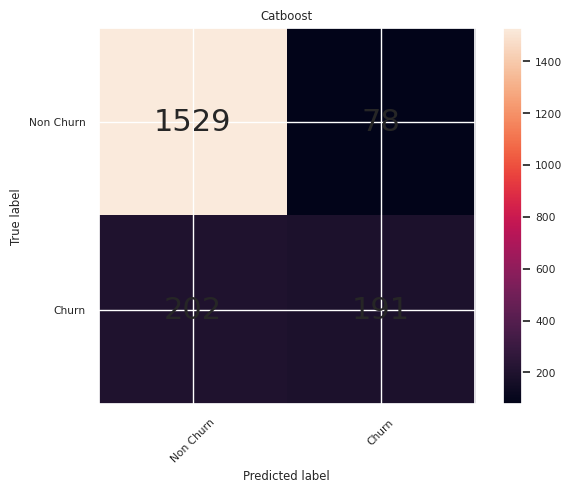

In [ ]:

plot_confusion_matrix(cfm, ['Non Churn','Churn'],title='Catboost')


Ensemble of Models
---

In [ ]:
list_of_models = {
    'logistic_regression' : LogisticRegression(random_state = 42, max_iter = 10000),
    'Random_forest' : RandomForestClassifier(n_estimators = 150, max_depth = 4, random_state = 42),
    "XGBoost" : xgb.XGBClassifier(n_estimators = 200, max_depth = 5, random_state = 42)
}

In [ ]:
f1_train_scores = []
f1_test_scores = []
recall_test_scores = []
model_names = list(list_of_models.keys())

In [ ]:
model_names

['logistic_regression', 'Random_forest', 'XGBoost']


For Model: logistic_regression

For Training Set:

Macro F1 Score: 0.44320712694877507

Confusion Matrix:


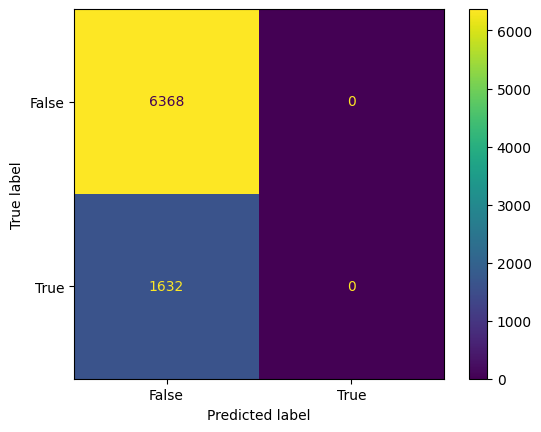

For Test Set:

Macro F1 Score: 0.4436717663421419

Confusion Matrix:


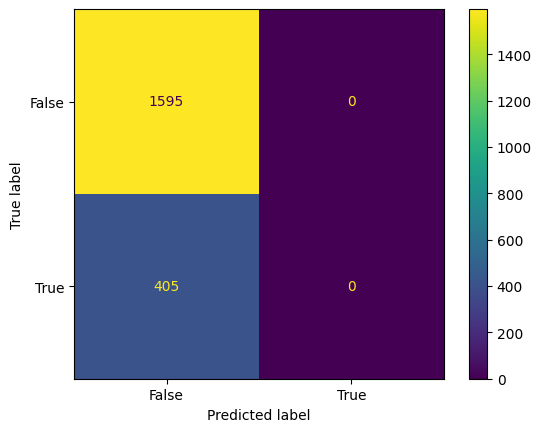


For Model: Random_forest

For Training Set:

Macro F1 Score: 0.6369359573181912

Confusion Matrix:


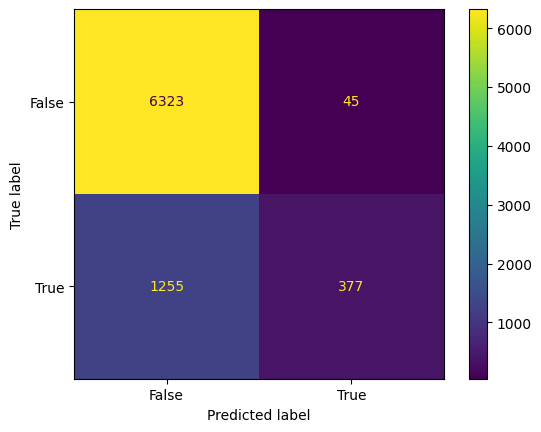

For Test Set:

Macro F1 Score: 0.6590613223706748

Confusion Matrix:


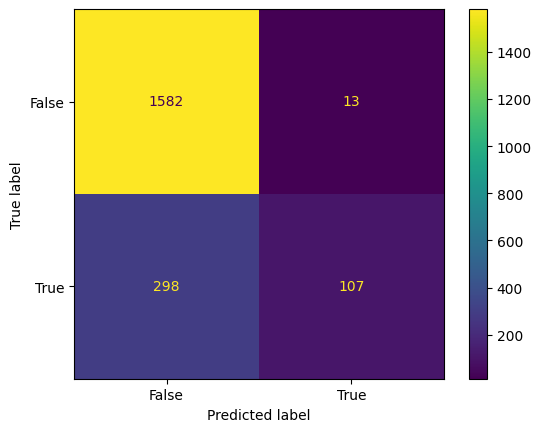


For Model: XGBoost

For Training Set:

Macro F1 Score: 0.9208428061749498

Confusion Matrix:


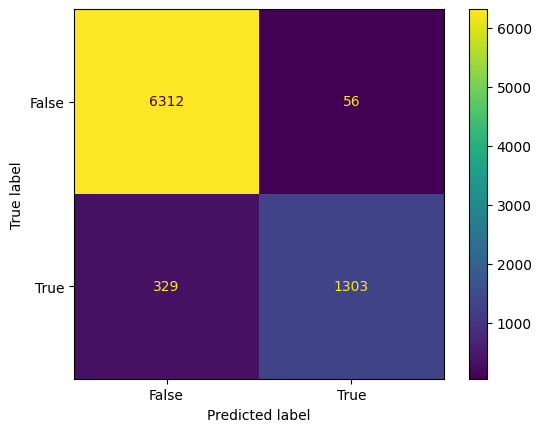

For Test Set:

Macro F1 Score: 0.7385978048961475

Confusion Matrix:


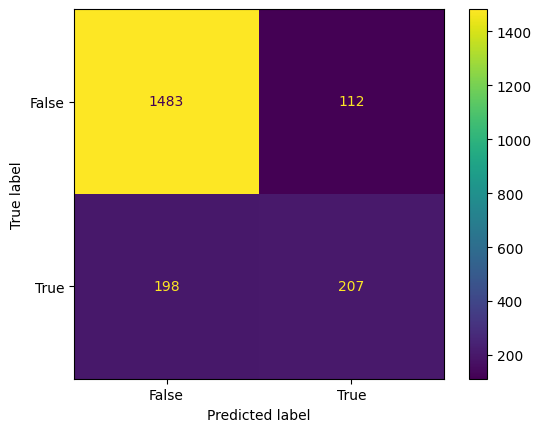

In [ ]:
for model in model_names:
    print("\nFor Model:", model)

    list_of_models[model].fit(X_train, y_train)

    print("\nFor Training Set:")

    y_train_pred = list_of_models[model].predict(X_train)

    f1_train = f1_score(y_train, y_train_pred, average='macro')
    print("\nMacro F1 Score:", f1_train)

    print("\nConfusion Matrix:")
    Confusion_Matrix = confusion_matrix(y_train.values, y_train_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = Confusion_Matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

    print("For Test Set:")

    y_test_pred = list_of_models[model].predict(X_test)

    f1_test = f1_score(y_test, y_test_pred, average='macro')
    print("\nMacro F1 Score:", f1_test)

    recall_test_score = recall_score(y_test, y_test_pred, average='macro')

    print("\nConfusion Matrix:")
    Confusion_Matrix = confusion_matrix(y_test, y_test_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = Confusion_Matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

    f1_train_scores.append(f1_train)
    f1_test_scores.append(f1_test)
    recall_test_scores.append(recall_test_score)

In [ ]:
print("model_names           f1_train_scores  f1_test_scores   recall_test_scores")
for i in range(len(model_names)):
    print(f"{model_names[i]:<22} {f1_train_scores[i]:.6f}          {f1_test_scores[i]:.6f}.          {recall_test_scores[i]:.6f}")

model_names           f1_train_scores  f1_test_scores   recall_test_scores
logistic_regression    0.443207          0.443672.          0.500000
Random_forest          0.636936          0.659061.          0.628024
XGBoost                0.920843          0.738598.          0.720446


In [ ]:
df_score=pd.DataFrame()
df_score['model']=model_names
df_score['f1_train_scores']=f1_train_scores
df_score['f1_test_scores']=f1_test_scores
df_score['recall_test_scores']=recall_test_scores
df_score

,model,f1_train_scores,f1_test_scores,recall_test_scores
0,logistic_regression,0.443207,0.443672,0.500000
1,Random_forest,0.636936,0.659061,0.628024
2,XGBoost,0.920843,0.738598,0.720446


In [ ]:
# convert to table
from IPython.display import HTML
HTML(df_score.to_html())

,model,f1_train_scores,f1_test_scores,recall_test_scores
0,logistic_regression,0.443207,0.443672,0.500000
1,Random_forest,0.636936,0.659061,0.628024
2,XGBoost,0.920843,0.738598,0.720446


In [ ]:
log_reg_model = LogisticRegression(random_state = 42, max_iter = 10000)
xgb_model = xgb.XGBClassifier(n_estimators = 200, max_depth = 5, random_state = 42)

#fit logistic regression model
log_reg_model.fit(X, y)
#fit xgb model
xgb_model.fit(X, y)

#predict using ensemble of both the models
y_pred_proba_log = [x[1] for x in log_reg_model.predict_proba(X)]
y_pred_proba_xgb = [x[1] for x in xgb_model.predict_proba(X)]
y_pred_proba_log = np.array(y_pred_proba_log)
y_pred_proba_xgb = np.array(y_pred_proba_xgb)

y_pred_proba = (y_pred_proba_log + y_pred_proba_xgb) / 2.0

y_pred = np.where(y_pred_proba > 0.4, 1, 0)





Macro F1 Score: 0.8647570633146873

Macro Recall Score: 0.8357139743823776

Confusion Matrix:


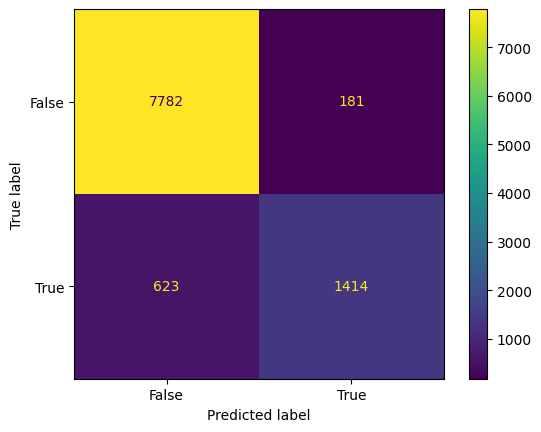

In [ ]:
f1 = f1_score(y, y_pred, average = 'macro')
print("\nMacro F1 Score:", f1)

recall = recall_score(y, y_pred, average = 'macro')
print("\nMacro Recall Score:", recall)

print("\nConfusion Matrix:")
Confusion_Matrix = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = Confusion_Matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
#Save and export models to be used in deployment
import pickle
#Save and export models to be used in deployment

pickle.dump(log_reg_model, open('churn_logistic_regression_model_for_deployment.pkl','wb'))
pickle.dump(xgb_model, open('churn_xgb_model_for_deployment.pkl','wb'))

In [ ]:
X.head(5)

,Fance,Spain,Germany,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,1,0,0,1,42,2,0.00,1,1,1,101348.88
1,0,1,0,1,41,1,83807.86,1,0,1,112542.58
2,1,0,0,1,42,8,159660.80,3,1,0,113931.57
3,1,0,0,1,39,1,0.00,2,0,0,93826.63
4,0,1,0,1,43,2,125510.82,1,1,1,79084.10


In [ ]:
X.columns

Index(['Fance', 'Spain', 'Germany', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')

Imbalance Problem
---
Gerenally, churn data is a little small such that affects the prediction. Here we can enlarge the churn dataset by simulation, and re-make the prediction model:

```python
X = df_data_model.loc[:, df_data_model.columns!=’churn’]
y = df_data_model[‘churn’]

# from imblearn.over_sampling import SMOTE
smote = SMOTE()
# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)
print(‘Original dataset shape’, Counter(y))
print(‘Resample dataset shape’, Counter(y_smote))

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X_smote, y_smote, train_size=0.7, test_size=0.3, random_state=0)
# summarize
print(‘Train’, X_train.shape, y_train.shape)
print(‘Test’, X_valid.shape, y_valid.shape)

#adaboost model training
ada_clf = AdaBoostClassifier(random_state=0)
kfold = KFold(n_splits = 10, random_state = 5)
results = cross_val_score(ada_clf, X_train, y_train, cv = kfold)
print(results.mean())


#train model
ada_clf.fit(X_train, y_train)
#make predictions
y_pred = ada_clf.predict(X_valid)
#metrics
print('Model accuracy score: ',accuracy_score(y_valid,y_pred))
print('Confusion matrix: ')
print(confusion_matrix(y_valid,y_pred))
print(classification_report(y_valid,y_pred))
```

Appendix, Pycaret Review
---

In [ ]:
!pip install -U pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56

In [ ]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
X['churn']=y

In [ ]:
X.head(2)

,Fance,Spain,Germany,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,1,0,0,1,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,1,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
clf = setup(data=X,target='churn',session_id=123)
best = compare_models()

,Description,Value
0,Session id,123
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 12)"
4,Transformed data shape,"(10000, 12)"
5,Transformed train set shape,"(7000, 12)"
6,Transformed test set shape,"(3000, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8619,0.8618,0.4629,0.7683,0.5770,0.5005,0.5238,0.7790
lightgbm,Light Gradient Boosting Machine,0.8583,0.8478,0.4867,0.7292,0.5832,0.5019,0.5171,1.3080
rf,Random Forest Classifier,0.8551,0.8443,0.4495,0.7377,0.5582,0.4777,0.4989,0.9610
ada,Ada Boost Classifier,0.8523,0.8435,0.4580,0.7174,0.5581,0.4746,0.4924,0.3830
xgboost,Extreme Gradient Boosting,0.8490,0.8323,0.4888,0.6816,0.5688,0.4803,0.4904,0.2040
et,Extra Trees Classifier,0.8473,0.8351,0.4447,0.6967,0.5424,0.4561,0.4729,1.0190
lr,Logistic Regression,0.8123,0.7678,0.2160,0.6182,0.3172,0.2372,0.2826,1.1030
lda,Linear Discriminant Analysis,0.8097,0.7718,0.2427,0.5807,0.3405,0.2512,0.2845,0.0710
ridge,Ridge Classifier,0.8079,0.7718,0.1339,0.6352,0.2201,0.1611,0.2259,0.0410
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0340


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
X.head(2)

,Fance,Spain,Germany,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,1,0,0,1,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,1,41,1,83807.86,1,0,1,112542.58,0


Improvements
---
- Using SHAP to analyze the key factors driving churn predictions from the XGBoost model
- Identifying high-risk customers based on a probability threshold
- Implementing a function to regularly score the full customer base and save high-risk cases
- Setting up the scoring function to run as a recurring monthly job

In [ ]:
!pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
# Root Cause Analysis
import shap
import matplotlib.pyplot as plt

In [ ]:


# Load trained XGBoost model
xgb_model = pickle.load(open('churn_xgb_model.pkl', 'rb'))

# Sample customer data
customer_data = X.sample(100)

# Compute SHAP values to understand feature importance
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(customer_data)

# Visualize top factors driving churn predictions
shap.summary_plot(shap_values, customer_data, plot_type="bar")
plt.show()

# Churn Prevention
# Identify high-risk customers based on churn probability threshold
from sklearn.metrics import roc_curve

# Compute probability predictions
y_prob = xgb_model.predict_proba(X)[:,1]

# Compute false positive and true positive rates
fpr, tpr, thresholds = roc_curve(y, y_prob)

# Find threshold for 80% tpr
tpr80 = 0.8
idx = np.argwhere(tpr >= tpr80)[0]
threshold = thresholds[idx]

# Customers above threshold are high-risk
high_risk_customers = X[y_prob >= threshold]

print(f"Number of high-risk customers: {len(high_risk_customers)}")

# Monitoring System
import datetime

# Score full customer base each month
def score_customer_base(date):
    customers = get_all_customers(date)
    customers = preprocess_data(customers)
    scores = xgb_model.predict_proba(customers)[:,1]
    high_risk = customers[scores >= threshold]

    # Save high-risk cases for further action
    high_risk.to_csv(f"high_risk_{date}.csv")

# Set up monitoring job to run monthly
next_run = datetime.datetime.today() + datetime.timedelta(days=30)
score_customer_base(next_run)

Homework
---
Whatever method was used, `Domain Expertise` is the the important factor where the decision was made.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# gdrive/MyDrive/2023/2023-2-Python-AI

Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive/2023/2023-2-Python-AI/data

'Bank Customer Churn Prediction.csv'   sf_incidents16.csv   zipcodes_geo.json
 Consumer_Complaints.csv.zip	       sf_incidents17.csv
 crime_predictions.json		       uber-dataset.csv


In [ ]:
# Very complainted in the second issue
import pandas as pd
df = pd.read_csv('gdrive/MyDrive/2023/2023-2-Python-AI/data/Consumer_Complaints.csv.zip')
df.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/2016,Closed with explanation,Yes,No,2141773


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903983 entries, 0 to 903982
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 903983 non-null  object
 1   Product                       903983 non-null  object
 2   Sub-product                   668823 non-null  object
 3   Issue                         903983 non-null  object
 4   Sub-issue                     426386 non-null  object
 5   Consumer complaint narrative  199970 non-null  object
 6   Company public response       257981 non-null  object
 7   Company                       903983 non-null  object
 8   State                         894758 non-null  object
 9   ZIP code                      894705 non-null  object
 10  Tags                          126038 non-null  object
 11  Consumer consent provided?    375434 non-null  object
 12  Submitted via                 903983 non-null  object
 13 

In [ ]:
# delete the feature which is absent too many items
df = df[pd.notnull(df['Consumer complaint narrative'])]
len(df)

199970

In [ ]:
df = df[['Product', 'Consumer complaint narrative']]
df['category_id'] = df['Product'].factorize()[0]
df.head(5)

<ipython-input-15-f45d0f3712bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category_id'] = df['Product'].factorize()[0]


,Product,Consumer complaint narrative,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


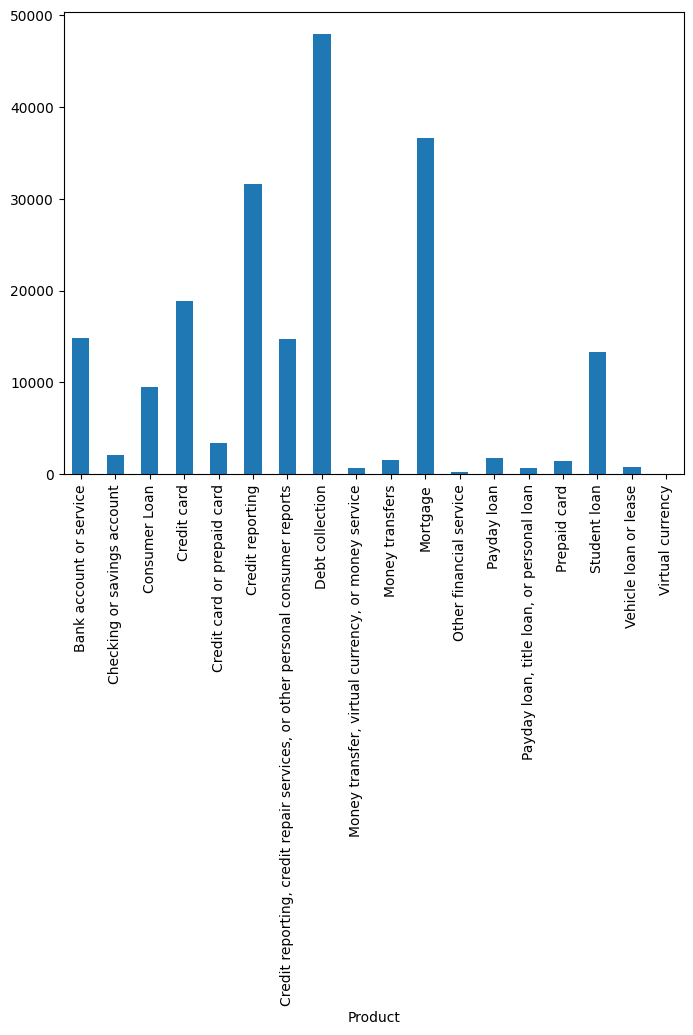

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product')['Consumer complaint narrative'].count().plot.bar(ylim=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df['Consumer complaint narrative']).toarray()
labels = df.category_id
features.shape

In [ ]:
import gc
gc.collect()

0

In [ ]:
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [ ]:
# failed, scikit-learn 1.2.2
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

In [ ]:
import numpy as np
from scipy.stats import beta

class BetaTargetEncoder:
    def __init__(self):
        self.encoder = {}

    def fit(self, X, y):
        for i, category in enumerate(np.unique(X)):
            category_values = X[X == category]
            target_values = y[X == category]
            self.encoder[category] = beta.fit(target_values, [len(target_values), len(target_values) - len(target_values)])

    def transform(self, X):
        encoded_values = []
        for category in np.unique(X):
            category_values = X[X == category]
            encoded_values.append(self.encoder[category].sf(category_values))
        return np.array(encoded_values).T

# Example usage:
import numpy as np
from scipy.stats import beta

class BetaTargetEncoder:
    def __init__(self):
        self.encoder = {}

    def fit(self, X, y):
        for i, category in enumerate(np.unique(X)):
            category_values = X[X == category]
            target_values = y[X == category]
            self.encoder[category] = beta.fit(target_values, [len(target_values), len(target_values) - len(target_values)])

    def transform(self, X):
        encoded_values = []
        for category in np.unique(X):
            category_values = X[X == category]
            encoded_values.append(self.encoder[category].sf(category_values))
        return np.array(encoded_values).T

# Example usage:
X2 = np.array(['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'])
y2 = np.array([1, 2, 3, 4, 5, 6, 7, 8])

bte = BetaTargetEncoder()
bte.fit(X2, y2)
encoded = bte.transform(X2)
print(encoded)




ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

Appendix
---
1. Hyperparmeter

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [40]:
params = {
        'min_child_weight': [1, 5, 10],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


In [46]:
xgb3 = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [47]:
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
random_search = RandomizedSearchCV(xgb, param_distributions=params, \
                                   n_iter=param_comb, scoring='accuracy',\
                                   n_jobs=4,
                                   cv=skf.split(X_train,y_train),
                                   verbose=3, random_state=42 )

In [48]:
random_search.fit(X_train,y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7d3e7c15d930>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=600, n_jobs=None,
                                           nthread=1, num_parallel_tree=None, ...),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=3)

In [49]:
print(random_search.best_score_)


0.9495495543652956


In [50]:
from pprint import pprint
pprint(random_search.best_estimator_.get_params())

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 1.0,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.5,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.05,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 600,
 'n_jobs': None,
 'nthread': 1,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'silent': True,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}
